# Задача 6

## Численное решение УрЧП

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Определение классов

In [2]:
# переопределение Main-класса из 5-й задачи

class MainSolve():
    
    def __init__(self, f, u_0, x_start, x_end, h, t_start, t_end, dt):
        # определение вектор-функции и начального условия
        self.f = f
        self.u_0 = u_0
        
        # определение параметров сетки по времени
        self.dt = dt
        self.t_start = float(t_start)
        self.t_end = float(t_end)
        self.t_num_blocks = int((float(t_end) - float(t_start)) / dt)
        self.t_num_points = self.t_num_blocks + 1
        
        # определение параметров сетки по пространству
        self.h = h
        self.x_start = float(x_start)
        self.x_end = float(x_end)
        self.x_num_blocks = int((float(x_end) - float(x_start)) / h)
        self.x_num_points = self.x_num_blocks + 1
        
        # задаём массивы для решения и сеток по времени и пространству
        self.solution_arr = np.zeros((self.t_num_points, self.x_num_points)) # двумерный массив
        self.time_arr = np.linspace(t_start, t_end, self.t_num_points)
        self.space_arr = np.linspace(x_start, x_end, self.x_num_points)
                
    
    def solve(self):
        self.solution_arr[0] = self.u_0(self.space_arr)

        for i in range(self.t_num_blocks):
            u_old = self.solution_arr[i]                
            self.solution_arr[i + 1] = u_old + self.dt * np.dot(self.b, self.k(u_old))

            
    def k(self, u_i):
        k = np.zeros((len(self.b), len(u_i)))
        k[0] = self.f(u_i)
        for i in range(len(k) - 1):
            k[i + 1] = self.f(u_i + self.dt * np.dot(self.a[i + 1, :], k))
        return k

#### Задаём дочерние классы

In [3]:
# метод Эйлера
# меняются только входные данные для коструктора класса, если сравнивать с 5-й задачей

class ExplicitEuler(MainSolve):

    def __init__(self, f, u_0, x_start, x_end, h, t_start, t_end, dt):
        super().__init__(f, u_0, x_start, x_end, h, t_start, t_end, dt)
        self.a = np.array([0])
        self.b = np.array([1])

In [4]:
# метод Хойна

class Heun(MainSolve):

    def __init__(self, f, u_0, x_start, x_end, h, t_start, t_end, dt):
        super().__init__(f, u_0, x_start, x_end, h, t_start, t_end, dt)
        self.a = np.array([[0, 0], [1, 0]])
        self.b = np.array([1/2, 1/2])

In [5]:
# метод Рунге - Кутты

class RunKut(MainSolve):
    
    def __init__(self, f, u_0, x_start, x_end, h, t_start, t_end, dt):
        super().__init__(f, u_0, x_start, x_end, h, t_start, t_end, dt)
        self.a = np.array([
            [  0,   0,   0,   0],
            [1/2,   0,   0,   0],
            [  0, 1/2,   0,   0],
            [  0,   0,   1,   0]
            ])
        self.b = np.array([1/6, 1/3, 1/3, 1/6])

In [6]:
# класс для функтора правой части

class RightHandSide:
    
    def __init__(self, k, h, left, right):
        self._k = float(k)
        self._h = float(h)
        self._l = float(left)
        self._r = float(right)
    
    def __call__(self, u):
        F = np.zeros(len(u))
        F[0], F[-1] = self._l, self._r
        A = np.zeros((len(u), len(u)))
        np.fill_diagonal(A, -2)
        np.fill_diagonal(A[1:], 1)
        np.fill_diagonal(A[:, 1:], 1)
        return (self._k / self._h ** 2) * (A @ u + F)

### Использование классов

In [16]:
methods_class = [ExplicitEuler, Heun, RunKut]

k = 0.1
h = 1/25
dt = h**2 / (200 * k)

rhs = RightHandSide(k, h, left=0, right=0)

In [17]:
def u_0(x):
    ans = np.zeros(len(x))
    for i in range(len(x)):
        if 0.4 <= x[i] <= 0.6:
            ans[i] = 1
        elif 0 < x[i] < 0.4 and 0.6 < i < 1: 
            ans[i] = 0

    return ans

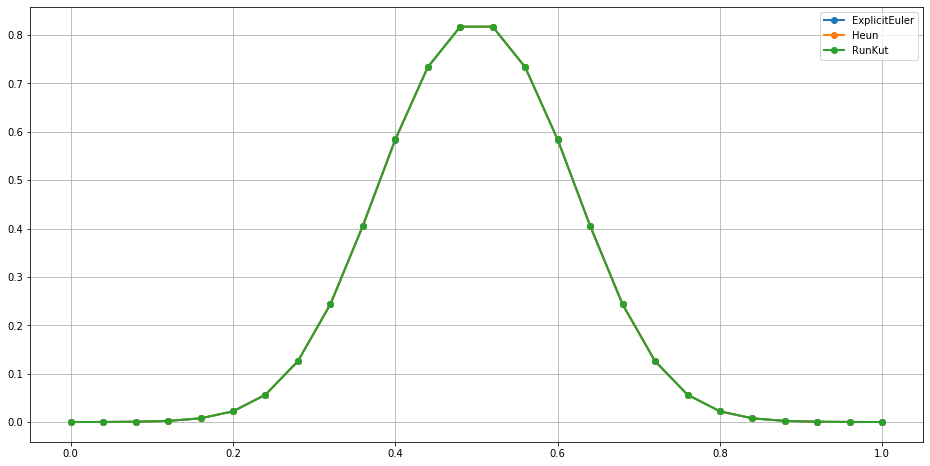

In [18]:
plt.figure(figsize=(16,8))

for method in methods_class:
        meth = method(f=rhs, u_0=u_0, x_start=0, x_end=1, h=h, t_start=0, t_end=0.04, dt=dt)    
        meth.solve()
        plt.plot(meth.space_arr, +meth.solution_arr[-1], '-o', linewidth=2, label=meth.__class__.__name__)
        
plt.grid('off')
plt.legend(loc='best')
plt.show()